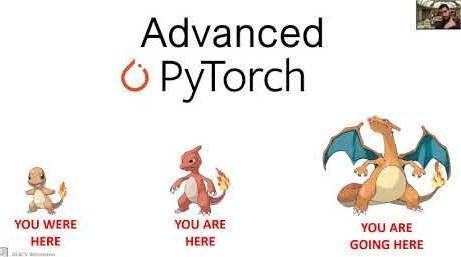

# **PyTorch Next Steps, Handwritten Digit Recognition : A Comprehensive Guide**

#### Think of building a neural network like teaching a robot to recognize objects using trial and error. PyTorch helps us do this efficiently. This notebook will guide you through building a neural network to recognize handwritten digits using the MNIST dataset and PyTorch.


## **1. Importing Necessary Libraries**
This section imports essential Python libraries for building and training our neural network.  We'll use `torch` (PyTorch) and its submodules for neural network operations, `torchvision` for the MNIST dataset and image transformations, and other common libraries for data handling and visualization.

These libraries provide the tools necessary to define the model, load and preprocess the data, train the network, and visualize the results. The combination of PyTorch's deep learning capabilities with standard data science tools makes this a powerful framework for image classification.

<img src="https://media.licdn.com/dms/image/v2/C5622AQEfw4J2wKWv8A/feedshare-shrink_800/feedshare-shrink_800/0/1642765164511?e=1744243200&v=beta&t=yH-ZTqtfIB2k6cRGcutwGZMkpIH5YXiCEREd9k7tyGk" alt="meme1" width="400"/>

In [ ]:
# ## Importing Libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

## ***Setting up the Dataset***


This section is where we prepare our MNIST dataset for the neural network! We're essentially giving the images a "makeover" to help our model learn better. First, `transforms.ToTensor()` turns the images into PyTorch tensors, which are like numerical grids that the computer can easily work with.

Then comes the `transforms.Normalize((0.5,), (0.5,))` part. Think of it as adjusting the brightness and contrast of the images so they're in a consistent range. Normalizing helps the neural network learn more effectively because it ensures that no single pixel has too much influence. The `(0.5,)` values are the mean and standard deviation we're using for this adjustment, kind of like setting the white balance on a camera! This transformation maps the pixel values to a range between -1 and 1.

In [ ]:
# Define transformations for normalization and conversion to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

## **Loading the Dataset for creating the Neural Network**

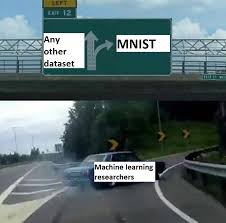

### **MNIST Dataset Description**

The MNIST (Modified National Institute of Standards and Technology) dataset is a widely-used dataset in the field of machine learning and computer vision. It consists of a collection of handwritten digits, from 0 to 9, and serves as a benchmark for developing and testing machine learning algorithms. The dataset was created from samples of handwritten digits by high school students and employees of the United States Census Bureau.

<img src="https://corochann.com/wp-content/uploads/2021/09/mnist_plot.png" alt="CNN" width="600" height="300" style="float: right; margin-left: 10px; margin-top: 20px"/>

#### ***Dataset Details***

- **Number of Classes:** 10 (Digits 0 through 9)
- **Image Size:** 28 x 28 pixels
- **Number of Samples:**
  - Training Set: 60,000 images
  - Test Set: 10,000 images
- **Data Split:**
  - The dataset is divided into two main parts: a training set and a test set.
- **Format:**
  - Each image is grayscale, with pixel values ranging from 0 (black) to 255 (white).
  - The dataset is structured as a collection of 28x28-pixel images.
- **Labeling:**
  - Each image is associated with a corresponding label indicating the digit it represents.
- **Purpose:**
  - The MNIST dataset is commonly used for training and evaluating machine learning models, especially for tasks related to image classification, digit recognition, and deep learning.
- **Usage:**
  - Researchers and practitioners often use MNIST as a benchmark dataset to develop, validate, and compare image classification algorithms and deep neural networks.



In [ ]:
# Load MNIST dataset
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

### **DataLoader for Training and Testing**

This cell creates **DataLoaders** for the training and testing datasets. A DataLoader is a PyTorch utility that helps manage datasets efficiently by loading data in batches, shuffling it, and handling parallel processing.

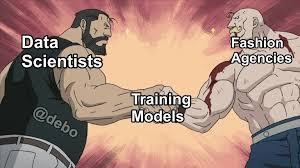

- `train_loader`: Loads the training dataset in batches of size 128 and shuffles the data to improve model generalization.
- `test_loader`: Loads the test dataset in batches of size 128 without shuffling (since order doesn't matter during evaluation).

DataLoaders make it easier to handle large datasets and optimize the training process.


In [ ]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

In [ ]:
## Exploring the Dataset
print(f"Training data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")
print(f"Shape of a single image: {train_data.data[0].shape}")
print(f"Labels: {train_data.targets.unique()}")

Training data size: 60000
Test data size: 10000
Shape of a single image: torch.Size([28, 28])
Labels: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


### **Visualizing Samples from the Dataset**

This cell defines a function `show_images` to display some sample images from the dataset along with their corresponding labels. It:

- Retrieves a batch of images and labels from the DataLoader.
- Uses Matplotlib to plot the first 5 images in grayscale.
- Displays the label (digit) for each image as the title.

This visualization helps in understanding the structure of the dataset and verifying that the data is loaded correctly.


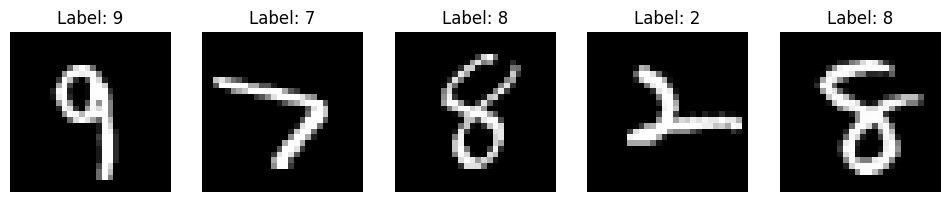

In [ ]:
# Visualizing some samples from the dataset
def show_images(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)
    fig, axes = plt.subplots(1, 5, figsize=(12, 3))
    for i in range(5):
        axes[i].imshow(images[i][0], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.show()

show_images(train_loader)

### **What is a Convolutional Neural Network (CNN)?**

A **Convolutional Neural Network (CNN)** is a type of deep learning model specifically designed for image data. Unlike fully connected networks, CNNs take advantage of the spatial structure of images by using convolutional layers to extract features such as edges, textures, and patterns. This makes them highly effective for tasks like image classification, object detection, and more.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*NzssUXXCX9Vs1-YP.jpeg" alt="CNN" width="600" height="300" style="float: right; margin-left: 10px; margin-top: 20px"/>

#### **Key Components of a CNN:**
1. **Convolutional Layers**:
   - These layers apply filters (kernels) to the input image to detect features like edges or textures.
   - Each filter slides over the image, performing a mathematical operation called convolution.
   - The result is a feature map that highlights the presence of specific patterns.

2. **Pooling Layers**:
   - Pooling layers reduce the spatial dimensions of feature maps (e.g., from 28x28 to 14x14).
   - This helps reduce computation and makes the model more robust to small changes in the input.

3. **Fully Connected Layers**:
   - After extracting features through convolution and pooling layers, fully connected layers are used to make predictions.

4. **Activation Functions**:
   - Non-linear activation functions like ReLU are applied after each layer to introduce non-linearity into the model.

### **ReLU Activation Function**

The **ReLU (Rectified Linear Unit)** activation function is one of the most widely used activation functions in deep learning. It is defined as:

\[
** f(x) = max(0, x)
\]

- For **positive inputs**, ReLU outputs the input itself.
- For **negative inputs**, it outputs 0.

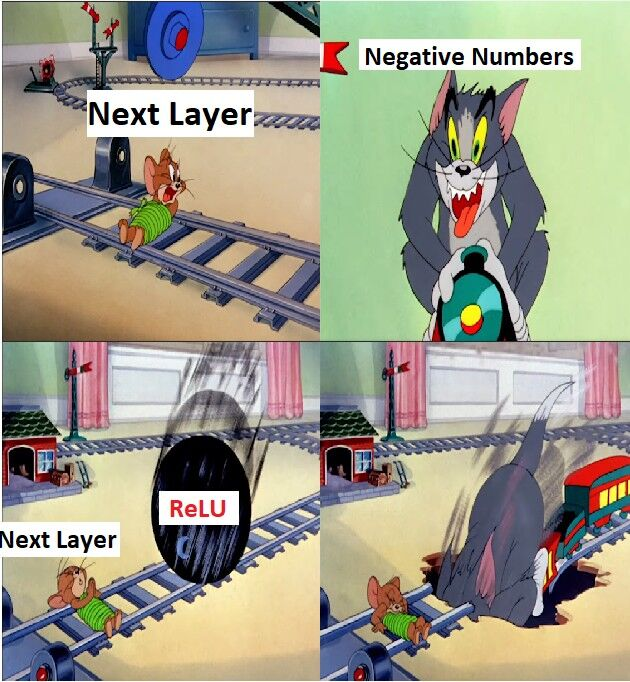

<img src="https://www.researchgate.net/profile/Anas-Issa/publication/370465617/figure/fig2/AS:11431281155101569@1683057835840/Activation-function-ReLu-ReLu-Rectified-Linear-Activation.png" alt="ReLU" width="300" height="300" style="float: right; margin-left: 10px;"/>

#### **Why is ReLU Popular?**
1. **Non-Linearity**: Adds non-linear behavior to the model, enabling it to learn complex patterns.
2. **Efficient Computation**: Simple and computationally cheap compared to functions like sigmoid or tanh.
3. **Avoids Vanishing Gradients**: Helps models train faster and deeper by mitigating the vanishing gradient problem.

ReLU is commonly used in hidden layers of neural networks, especially in convolutional and fully connected networks, due to its simplicity and effectiveness.

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(7 * 7 * 64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 7 * 7 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [ ]:
model = ConvNet()

# **Adam Optimizer: A Comprehensive Guide**

## ***What is Adam?***
**Adam (Adaptive Moment Estimation)** is an adaptive learning rate optimization algorithm that combines:
1. **Momentum** (accelerates gradients in relevant directions)
2. **RMSprop** (adapts learning rates per-parameter)
3. **Bias correction** (fixes initial estimation bias)

Introduced in 2015 by Kingma & Ba, it's widely used as the **default optimizer** for deep learning.

<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/0*HuWLj-nURYXgRKXP" alt="ReLU" width="400" height="300" style="float: right; margin-left: 10px;"/>

---
## **How Adam Optimizer Works**

Adam is an optimization algorithm that helps train neural networks efficiently. It works by combining three main strategies:
- **Adaptive Learning Rates**: Adjusts the learning rate for each parameter individually, ensuring that each part of the network learns at its own pace.
- **Momentum**: Keeps track of past gradients to maintain direction and speed, preventing the model from getting stuck or oscillating too much.
- **Bias Correction**: Fixes initial estimates to ensure accurate updates from the start, preventing overreaction to early noisy gradients.

By integrating these strategies, Adam achieves **efficient convergence** and is **robust to noise**, making it a popular choice for many deep learning tasks. It requires minimal tuning, often working well with default settings.



# **Cross-Entropy**

### **What is Cross-Entropy?**
Cross-entropy measures the difference between two probability distributions. In machine learning, it compares:
- **Actual distribution** (true labels, e.g., [1, 0] for "cat" vs. "dog").
- **Predicted distribution** (model's outputs, e.g., [0.8, 0.2]).

The goal is to **minimize** this difference, which improves predictions.

---

### **Why Use Cross-Entropy?**
- **Perfect for Classification**: Works with probabilities (e.g., softmax/sigmoid outputs).
- **Penalizes Confident Mistakes**: If the model is **very wrong**, cross-entropy gives a **large loss**.
- **Efficient for Training**: Helps models learn faster by focusing on correcting errors.

---



### **How It Works (Intuition)**

1. **Entropy Basics**:
   - **Entropy** measures "uncertainty" in data.  
     *Example*: A fair coin (max entropy) is harder to predict than a biased coin.

2. **Cross-Entropy**:
   - Measures how well the predicted probabilities match the true labels.  
   - **Lower cross-entropy = Better predictions**.

3. **Example**:  
   - **True Label**: [1, 0] (it’s a "cat").  
   - **Good Prediction**: [0.9, 0.1] → Low loss.  
   - **Bad Prediction**: [0.1, 0.9] → High loss.

   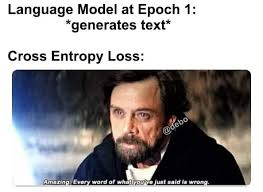

In [ ]:
# ## Optimizer and Loss Function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

### **Training the Model**

- **Model Preparation**: Sets the model to training mode.
- **Batch Processing**: Iterates through the dataset, moving data to the GPU/CPU.
- **Gradient Updates**: Computes predictions, calculates loss, backpropagates gradients, and updates model weights.
- **Metrics Tracking**: Accumulates total loss and counts correct predictions to calculate accuracy.
- **Returns**: Average loss and accuracy for the epoch.

This process is repeated for multiple epochs to improve model performance.


In [ ]:
# ## Training the Model
def train_model(model, loader, optimizer, criterion, device):
    model.train()
    epoch_loss = 0
    correct_predictions = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        correct_predictions += (preds == labels).sum().item()

    accuracy = (correct_predictions / len(loader.dataset)) * 100
    return epoch_loss / len(loader), accuracy


### **Evaluating the Model**

This function assesses the model's performance on a dataset (like test data). It:
- Sets the model to evaluation mode.
- Processes data in batches without gradient tracking.
- Calculates total loss and counts correct predictions.
- Returns average loss and accuracy for the dataset.


In [ ]:
# ## Evaluating the Model
def evaluate_model(model, loader, criterion, device):
    model.eval()
    test_loss = 0.0
    correct_predictions = 0

    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, preds = torch.max(outputs.data, 1)
            correct_predictions += (preds == labels).sum().item()

    accuracy = (correct_predictions / len(loader.dataset)) * 100
    return test_loss / len(loader), accuracy


In [ ]:
# ## Training and Validation Loop
num_epochs = 10  # Number of rounds to train the data
train_losses, train_accuracies = [], []  # Cache all the training values in a list
test_losses, test_accuracies = [], []   # Cache all the testing values in a list


### **Training Loop Execution**

This code runs the training process for the specified number of epochs. Each iteration:
1. **Trains the Model**: Updates weights using training data
2. **Evaluates the Model**: Checks performance on test data
3. **Tracks Metrics**: Stores loss and accuracy for both sets
4. **Prints Progress**: Shows epoch-wise results for monitoring

The loop continues until all epochs complete, gradually improving model performance.


In [ ]:
for epoch in range(num_epochs):
    train_loss, train_acc = train_model(model, train_loader, optimizer, criterion, device)
    test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch 1: Train Loss: 0.1915, Train Acc: 94.17%, Test Loss: 0.0485, Test Acc: 98.42%
Epoch 2: Train Loss: 0.0492, Train Acc: 98.46%, Test Loss: 0.0323, Test Acc: 98.89%
Epoch 3: Train Loss: 0.0356, Train Acc: 98.87%, Test Loss: 0.0292, Test Acc: 98.95%
Epoch 4: Train Loss: 0.0263, Train Acc: 99.15%, Test Loss: 0.0321, Test Acc: 99.01%
Epoch 5: Train Loss: 0.0188, Train Acc: 99.43%, Test Loss: 0.0374, Test Acc: 98.85%
Epoch 6: Train Loss: 0.0169, Train Acc: 99.45%, Test Loss: 0.0339, Test Acc: 98.87%
Epoch 7: Train Loss: 0.0132, Train Acc: 99.57%, Test Loss: 0.0263, Test Acc: 99.22%
Epoch 8: Train Loss: 0.0105, Train Acc: 99.66%, Test Loss: 0.0323, Test Acc: 99.03%
Epoch 9: Train Loss: 0.0087, Train Acc: 99.70%, Test Loss: 0.0318, Test Acc: 99.13%
Epoch 10: Train Loss: 0.0074, Train Acc: 99.76%, Test Loss: 0.0391, Test Acc: 98.84%


### **Loss Function: A Brief Overview**

A **loss function** is a mathematical tool used in machine learning to measure how well a model's predictions match the actual target values. It quantifies the "error" or "difference" between the predicted outputs and the true labels.

- **Purpose**: Guides the training process by providing feedback on model performance.
- **How it Works**: A higher loss indicates poor predictions, while a lower loss means better predictions.
- **Optimization Goal**: During training, the model adjusts its parameters to minimize the loss function, improving its accuracy over time.

In simple terms, the loss function acts as a guide, helping the model learn and improve by pointing out how far off its predictions are.

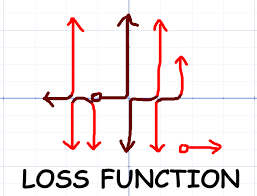

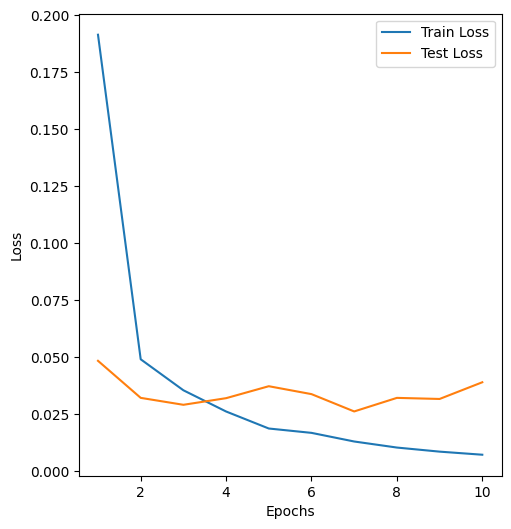

In [ ]:
# ## Plotting Training Progress
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1,num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1,num_epochs+1), test_losses,label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

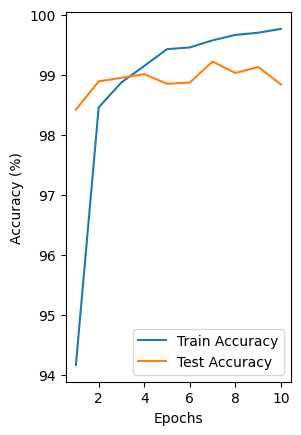

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(1,num_epochs+1), train_accuracies,label='Train Accuracy')
plt.plot(range(1,num_epochs+1), test_accuracies,label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()


plt.show()

### **Confusion Matrix Visualization**

**What is a Confusion Matrix?**  
A confusion matrix is a performance measurement tool for classification models. It shows:
- **Rows**: True class labels (actual values)
- **Columns**: Predicted class labels
- **Diagonal Cells**: Correct predictions  
- **Off-Diagonal Cells**: Misclassifications (model confusions)

**Code Explanation**  
This code:
1. Collects all model predictions and true labels from the test dataset
2. Uses `sklearn.metrics.confusion_matrix` to compute the matrix
3. Visualizes it with a heatmap using `seaborn`
4. Shows which digits (0-9) the model confuses most often

**Key Insights**  
- Helps identify patterns in model errors
- Reveals if the model struggles with specific digit pairs (e.g., 3 vs 8)
- Provides a clear visual of model performance across all classes


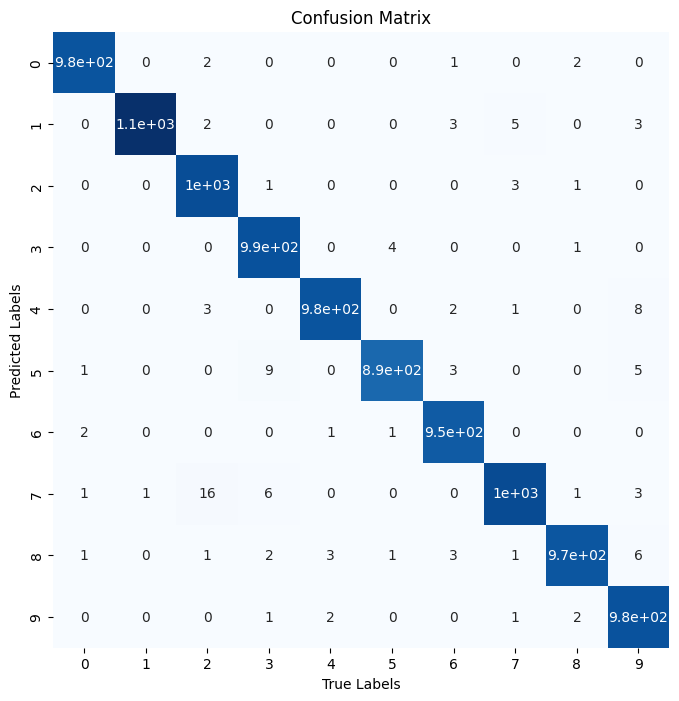

In [ ]:
# ## Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs.data.cpu(), dim=1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix.T,cmap="Blues",annot=True,cbar=False,square=True,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# ## Saving the Model
torch.save(model.state_dict(), "mnist_model.pth")
print("Model saved successfully.")

Model saved successfully.


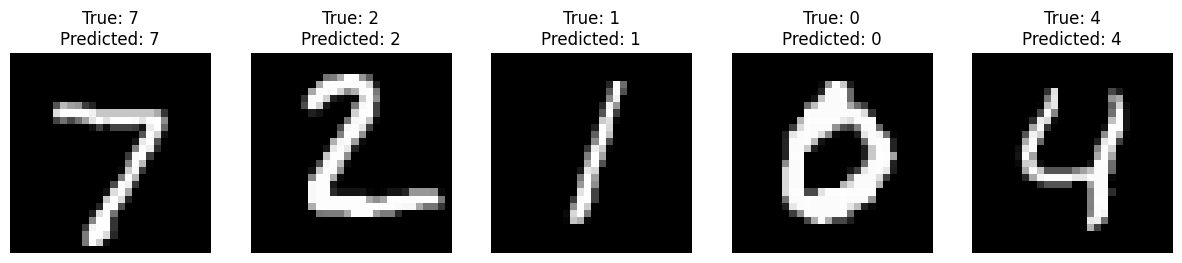

In [ ]:
# ## Prediction Section: Making Predictions on Test Images
def predict_and_visualize(model, loader):
    model.eval()

    with torch.no_grad():
        data_iter = iter(loader)
        images, labels_true = next(data_iter)

        # Move to device and make predictions
        images_device = images.to(device)
        outputs_predicted_logits = model(images_device)
        _, predicted_labels = torch.max(outputs_predicted_logits.cpu(), dim=1)

        # Visualize predictions vs true labels
        fig, axes = plt.subplots(1, 5, figsize=(15, 4))

        for i in range(5):
            axes[i].imshow(images[i][0], cmap='gray')
            axes[i].set_title(f"True: {labels_true[i]}\nPredicted: {predicted_labels[i]}")
            axes[i].axis('off')

predict_and_visualize(model,test_loader)

In [ ]:
! pip install pillow

<ipython-input-46-448b3cd51dca>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("mnist_model.pth"))


Saving 2.jpg to 2 (2).jpg


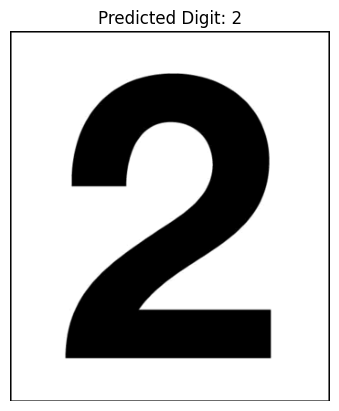

In [ ]:
from PIL import Image

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvNet().to(device)
model.load_state_dict(torch.load("mnist_model.pth"))
model.eval()

# Image transformation
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the image from the path
image_path = "path_to_your_image.jpg"  # Replace with your image path
image = Image.open(image_path)

# Preprocess the image
image_tensor = transform(image).unsqueeze(0).to(device)

# Make a prediction
with torch.no_grad():
    output = model(image_tensor)
    _, predicted = torch.max(output, 1)

plt.imshow(image, cmap='gray')
plt.title(f"Predicted Digit: {predicted.item()}")
plt.axis('off')
plt.show()


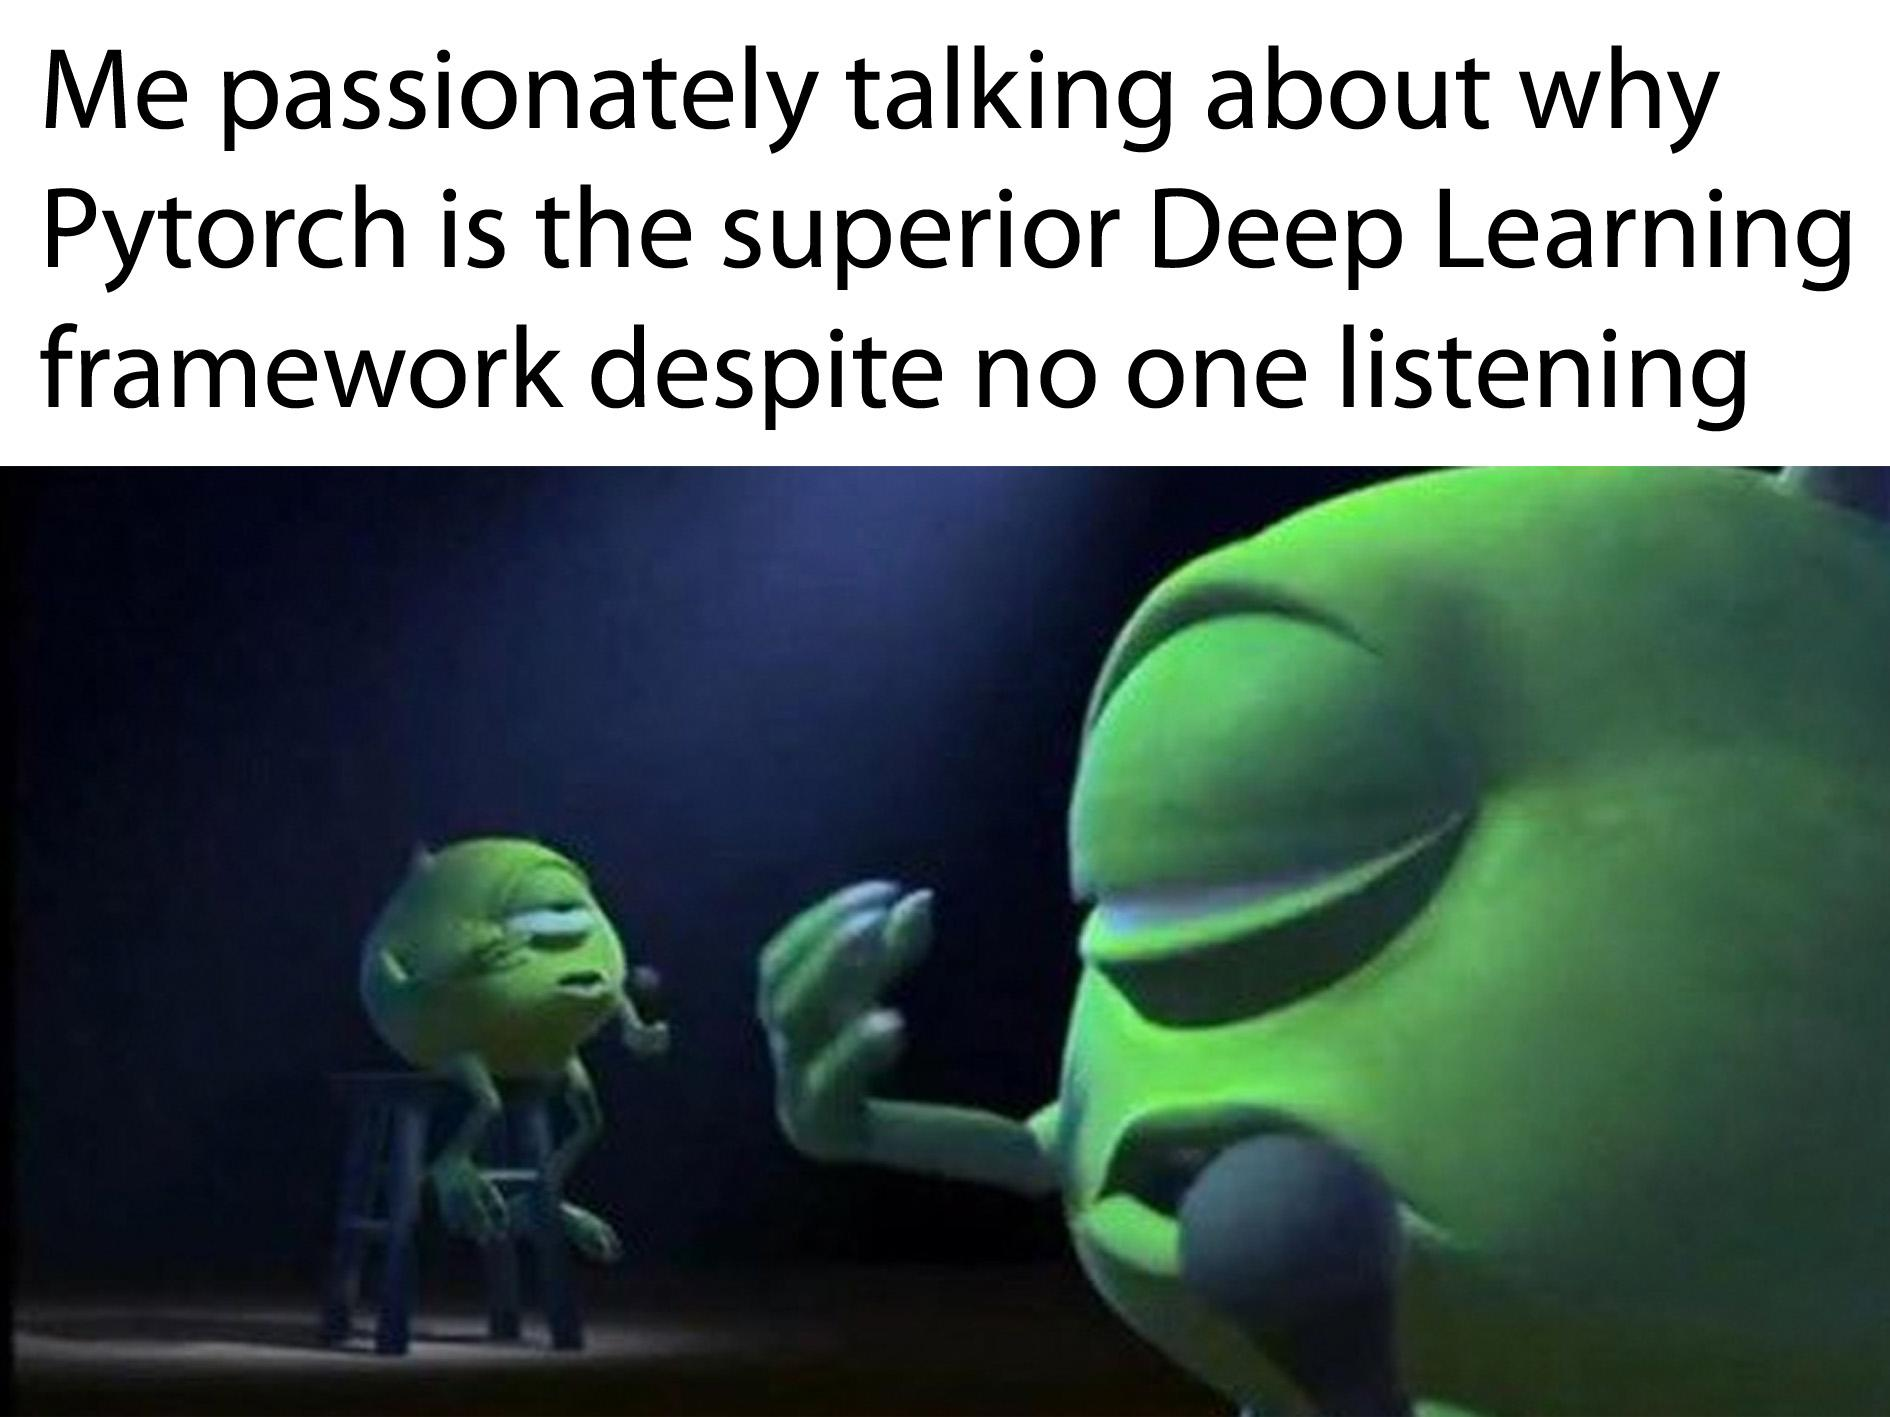